Correlation plot is between one population and two varaibles of comparison
T - tests compare means between two populations and one variable of comparison


stats.ttest_ind(df[df.State == 'UT'].Score, df[df.State =='UT'].Score)

        http://localhost:8888/tree?token=bbd94d3c8195a226912c267fd29c4a6191bbfd8ecd3afb6a

        crime-housing-austin-2015.csv
0.05 p - vaue is saying that there is a 1 in 20 chance that

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected




Potential t - test: two separate locations (or types of locations) and comparing a ratio of median home income and unemployment

Potential p - value test: median income and unemployment for all zip codes with murder 

In [91]:
import pandas as pd

import seaborn as sns

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

dataset = pd.read_csv('crime-housing-austin-2015.csv')
dataset['Medianhouseholdincome'] = dataset['Medianhouseholdincome'].str.replace('$', '').astype('float')
dataset['Unemployment'] = dataset['Unemployment'].str.replace('%', '').astype('float')
dataset['Medianrent'] = dataset['Medianrent'].str.replace('$', '').astype('float')

dataset['Percentageofrentalunitsinpoorcondition'] = dataset['Percentageofrentalunitsinpoorcondition'].str.replace('%', '').astype('float')
dataset= dataset.dropna()



datasetGrouped = dataset.groupby(['Zip_Code_Crime']).agg({'Medianhouseholdincome':'first', 'Unemployment':'first','Medianrent':'first', 'Percentageofrentalunitsinpoorcondition' : 'first'}).reset_index()
lowIncome = dataset[dataset.Medianhouseholdincome <= 30000]





lowIncomeAndHighUnemployment = lowIncome[lowIncome.Unemployment < 12]
##len(lowIncomeAndHighUnemployment)




<Axes: xlabel='count', ylabel='Unemployment'>

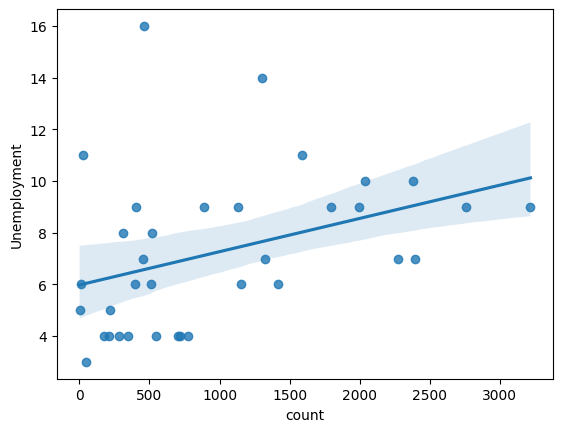

In [92]:
occurrences_per_value= dataset['Zip_Code_Crime'].value_counts().reset_index()

mergedDatasets = pd.merge(occurrences_per_value, datasetGrouped, on='Zip_Code_Crime')


sns.regplot(x='count', y='Unemployment',data=mergedDatasets)


In [93]:
## open up the other dataset

zipCodes = pd.read_csv('AustinZipCodes.csv')
zipCodes['Population'] = zipCodes['Population'].str.replace(',', '').astype('float')

zipCodes['Population'] = zipCodes['Population'].astype(int)
mergedDatasets.rename(columns={'Zip_Code_Crime': 'Zip Code'}, inplace=True)

zipCodesPopulationAndCrimes = pd.merge(mergedDatasets, zipCodes, on='Zip Code')



PearsonRResult(statistic=0.19415666616251118, pvalue=0.2637349808399133)

PearsonRResult(statistic=0.5115121202434136, pvalue=0.001988710150291236)

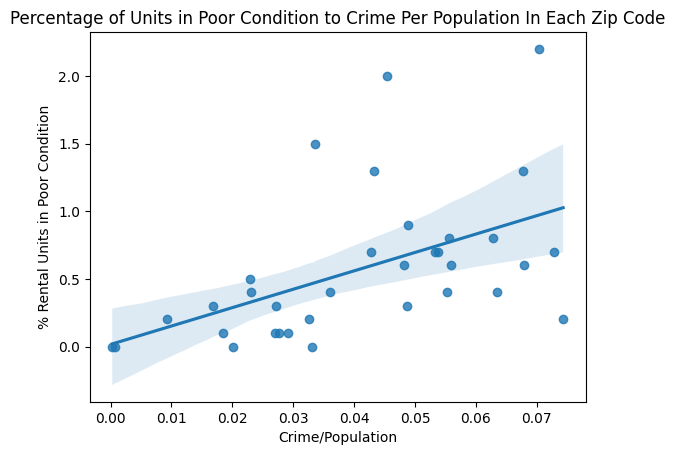

In [94]:

zipCodesPopulationAndCrimes['Crime/Population'] = zipCodesPopulationAndCrimes['count'] / zipCodesPopulationAndCrimes['Population']




zipCodesPopulationAndCrimes.rename(columns={'Percentageofrentalunitsinpoorcondition': '% Rental Units in Poor Condition'}, inplace=True)
#sns.regplot(x='Crime/Population', y='% Rental Units in Poor Condition',data=zipCodesPopulationAndCrimes)
display(stats.pearsonr(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition'], zipCodesPopulationAndCrimes['Crime/Population']))

zipCodesPopulationAndCrimes = zipCodesPopulationAndCrimes[zipCodesPopulationAndCrimes['Crime/Population'] < 0.5]

sns.regplot(x='Crime/Population', y='% Rental Units in Poor Condition',data=zipCodesPopulationAndCrimes)
plt.title('Percentage of Units in Poor Condition to Crime Per Population In Each Zip Code')
display(stats.pearsonr(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition'], zipCodesPopulationAndCrimes['Crime/Population']))


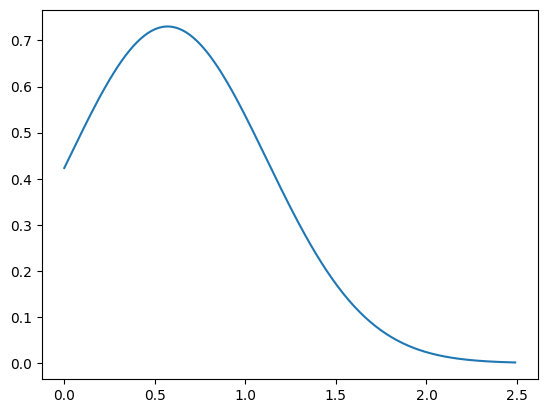

Zip Code  count  Medianhouseholdincome  Unemployment  Medianrent  \
0    78753.0   3219                39593.0           9.0       826.0   
1    78741.0   2760                30183.0           9.0       835.0   
2    78704.0   2392                50248.0           7.0       940.0   
3    78758.0   2382                41792.0          10.0       898.0   
4    78745.0   2272                49243.0           7.0       990.0   
5    78723.0   2040                41869.0          10.0       817.0   
7    78744.0   1798                41056.0           9.0       946.0   
8    78702.0   1585                34734.0          11.0       766.0   
9    78748.0   1419                65889.0           6.0      1095.0   
10   78759.0   1321                65672.0           7.0       962.0   
11   78705.0   1306                11917.0          14.0      1088.0   
12   78757.0   1150                55156.0           6.0       895.0   
13   78752.0   1131                33271.0           9.0       752.0   
14   78751.0    889                38624.0           9.0       865.0   
15   78749.0    773                80956.0           4.0      1150.0   
16   78746.0    720               125327.0           4.0      1221.0   
17   78703.0    705                92606.0           4.0      1183.0   
18   78731.0    550                78265.0           4.0      1016.0   
19   78724.0    518                35711.0           8.0       962.0   
20   78727.0    514                65687.0           6.0      1050.0   
21   78721.0    459                32131.0          16.0       870.0   
22   78729.0    455                57358.0           7.0      1008.0   
23   78754.0    403                53274.0           9.0       969.0   
24   78750.0    394                75958.0           6.0      1012.0   
25   78756.0    344                59685.0           4.0       888.0   
26   78722.0    311                44917.0           8.0       930.0   
27   78735.0    282                74571.0           4.0      1122.0   
28   78717.0    220                93305.0           5.0      1018.0   
29   78726.0    214                66096.0           4.0      1050.0   
30   78739.0    174               126525.0           4.0      2000.0   
31   78730.0     45               119573.0           3.0      1106.0   
32   78742.0     27                34076.0          11.0       639.0   
33   78728.0     13                47405.0           6.0       901.0   
34   78732.0      1               127726.0           5.0      1688.0   

    % Rental Units in Poor Condition   #               Location  \
0                                0.7  12  30.380366, -97.674764   
1                                0.6   4  30.229845, -97.715136   
2                                0.4   6  30.243128, -97.765874   
3                                0.8   7  30.387634, -97.705310   
4                                0.7  11  30.206806, -97.797108   
5                                1.3   5  30.305341, -97.683344   
7                                0.7  25  30.177015, -97.725888   
8                                2.2   8  30.263909, -97.714495   
9                                0.6  23  30.159688, -97.823287   
10                               0.2  15  30.400789, -97.755969   
11                               0.3   1  30.293474, -97.738268   
12                               0.7   9  30.351934, -97.732827   
13                               0.8   3  30.331288, -97.704660   
14                               0.4   2  30.310819, -97.722821   
15                               0.3  17  30.216168, -97.856006   
16                               0.1  26  30.296951, -97.811647   
17                               0.4  13  30.294204, -97.765114   
18                               0.5  14  30.345211, -97.767455   
19                               1.5  30  30.297099, -97.617767   
20                               0.4  16  30.428300, -97.718143   
21                               2.0  19  30.269811, -97.683126   
22       

245.69927042604192

In [95]:
# from scipy.stats import t
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 1)

# df = 2.74335149908
# mean, var, skew, kurt = t.stats(df, moments='mvsk')
# x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
# ax.plot(x, t.pdf(x, df), 'k-', lw=2, alpha=0.6, label='t pdf')
# ax.set_title('t pdf')
import statistics 
from scipy.stats import norm 


x_axis = np.arange(0, 2.5, 0.01) 
  
# Calculating mean and standard deviation 
mean = statistics.mean(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition']) 
sd = statistics.stdev(zipCodesPopulationAndCrimes['% Rental Units in Poor Condition']) 
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 




display(zipCodesPopulationAndCrimes)
std_deviation = np.std(zipCodesPopulationAndCrimes['Medianrent'])
std_deviation



## Option for providing an average: find the average time it takes for each zip code to clear a crime.
## Another option: find the average time it takes for each crime to be cleared

